## Import libraries

In [11]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from itertools import combinations
pd.set_option("display.max_rows", None)

### Functions

In [12]:

def to_date_format(df: pd.DataFrame)-> pd.DataFrame:
    df['DT_NOTIFIC'] = pd.to_datetime(
        df['DT_NOTIFIC'], dayfirst=True)
    df['DT_NASC'] = pd.to_datetime(
        df['DT_NASC'], dayfirst=True)
    return df

In [13]:

def chi2_function(vars: list[str], df: pd.DataFrame,order_by: str = 'p-valor')-> None:
    results = []

    for var1, var2 in combinations(vars, 2):
        tabela = pd.crosstab(df[var1], df[var2])
        
        chi2, p, _, _ = chi2_contingency(tabela)
        results.append({
            'var1': var1,
            'var2': var2,
            'p-valor': p,
            'chi2': chi2,
            'association': '✅ Yes' if p < 0.05 else '❌ No'
        })

    # Exibir resultados ordenados por p-valor
    df_results = pd.DataFrame(results).sort_values(by=order_by)
    print(df_results)

### Read data

In [14]:
path = "../data/dados_violencia_mulheres_ses"

files = [f for f in os.listdir(path) if f.endswith('.csv')]

dfs = [to_date_format(pd.read_csv(os.path.join(path, file), sep=';'))
       for file in files]


main = pd.concat(dfs, ignore_index=True)

main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388441 entries, 0 to 388440
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   DT_NOTIFIC  388441 non-null  datetime64[ns]
 1   DT_NASC     382825 non-null  datetime64[ns]
 2   NU_IDADE_N  388412 non-null  float64       
 3   CS_SEXO     388441 non-null  object        
 4   CS_RACA     382695 non-null  object        
 5   ID_MN_RESI  387495 non-null  object        
 6   LOCAL_OCOR  378460 non-null  object        
 7   OUT_VEZES   375551 non-null  object        
 8   LES_AUTOP   374831 non-null  object        
 9   VIOL_FISIC  377456 non-null  object        
 10  VIOL_PSICO  372815 non-null  object        
 11  VIOL_SEXU   372320 non-null  object        
 12  NUM_ENVOLV  373440 non-null  object        
 13  AUTOR_SEXO  376925 non-null  object        
 14  ORIENT_SEX  310969 non-null  object        
 15  IDENT_GEN   310969 non-null  object        
dtypes:

### Rename colums and create a copy

In [15]:
column_mapping = {
    'DT_NOTIFIC': 'notification_date',
    'DT_NASC': 'birth_date',
    'NU_IDADE_N': 'age',
    'CS_SEXO': 'sex',
    'CS_RACA': 'race',
    'ID_MN_RESI': 'city_residence',
    'LOCAL_OCOR': 'occurrence_place',
    'OUT_VEZES': 'previous_occurrences',
    'LES_AUTOP': 'self_harm',
    'VIOL_FISIC': 'physical_violence',
    'VIOL_PSICO': 'psychological_violence',
    'VIOL_SEXU': 'sexual_violence',
    'NUM_ENVOLV': 'num_perpetrators',
    'AUTOR_SEXO': 'perpetrator_sex',
    'ORIENT_SEX': 'sexual_orientation',
    'IDENT_GEN': 'gender_identity'
}

main = main.rename(columns=column_mapping)
df_cleaned = main.copy()
main.head()


,notification_date,birth_date,age,sex,race,city_residence,occurrence_place,previous_occurrences,self_harm,physical_violence,psychological_violence,sexual_violence,num_perpetrators,perpetrator_sex,sexual_orientation,gender_identity
0,2010-08-03,1937-11-02,72.0,Feminino,Parda,Governador Valadares,Residencia,Sim,Não,Sim,Sim,Não,Um,Masculino,NaN,NaN
1,2010-02-07,1992-04-30,17.0,Feminino,Parda,Montes Claros,Residencia,Ignorado,Não,Sim,Sim,NaN,Um,Masculino,NaN,NaN
2,2010-06-28,2003-04-07,7.0,Feminino,Ignorado,Governador Valadares,Ignorado,Ignorado,Não,Não,Sim,Sim,Um,Masculino,NaN,NaN
3,2010-01-07,1963-05-07,46.0,Feminino,Parda,São José do Goiabal,Residencia,Ignorado,NaN,Não,Não,Não,Um,Feminino,NaN,NaN
4,2010-05-20,1917-08-01,92.0,Feminino,Branca,Jaboticatubas,Residencia,Sim,NaN,Não,Não,Não,Dois ou mais,Masculino,NaN,NaN


## Analisy Variables

In [16]:
main.drop(columns=['notification_date', 'birth_date', 'age']).describe()

,sex,race,city_residence,occurrence_place,previous_occurrences,self_harm,physical_violence,psychological_violence,sexual_violence,num_perpetrators,perpetrator_sex,sexual_orientation,gender_identity
count,388441,382695,387495,378460,375551,374831,377456,372815,372320,373440,376925,310969,310969
unique,1,6,853,10,3,3,3,3,3,3,4,5,5
top,Feminino,Parda,Belo Horizonte,Residencia,Não,Não,Sim,Não,Não,Um,Masculino,Heterossexual,Não se aplica
freq,388441,170142,28158,263840,158391,249030,276330,246949,319796,283563,203255,180603,202642


In [17]:
main[['notification_date', 'birth_date', 'age']].describe()

,notification_date,birth_date,age
count,388441,382825,388412.000000
mean,2018-05-08 15:38:50.679820032,1987-09-25 21:03:26.309410240,30.104054
min,2010-01-01 00:00:00,1900-12-24 00:00:00,-1.000000
25%,2015-07-28 00:00:00,1978-05-02 00:00:00,18.000000
50%,2018-07-23 00:00:00,1989-07-31 00:00:00,28.000000
75%,2021-06-14 00:00:00,1999-06-17 00:00:00,39.000000
max,2023-12-31 00:00:00,2023-12-31 00:00:00,121.000000
std,NaN,NaN,15.937374


### Test chi2 contingency

In [18]:

vars = ['race', 'city_residence', 'occurrence_place', 'previous_occurrences',
             'self_harm', 'physical_violence', 'psychological_violence', 'sexual_violence', 'num_perpetrators',
             'perpetrator_sex', 'sexual_orientation', 'gender_identity','sex']
filtered_vars = [v for v in vars if main[v].nunique() > 1]
chi2_function(filtered_vars, main)


                      var1                    var2        p-valor  \
0                     race          city_residence   0.000000e+00   
1                     race        occurrence_place   0.000000e+00   
2                     race    previous_occurrences   0.000000e+00   
3                     race               self_harm   0.000000e+00   
4                     race       physical_violence   0.000000e+00   
5                     race  psychological_violence   0.000000e+00   
6                     race         sexual_violence   0.000000e+00   
7                     race        num_perpetrators   0.000000e+00   
8                     race         perpetrator_sex   0.000000e+00   
9                     race      sexual_orientation   0.000000e+00   
10                    race         gender_identity   0.000000e+00   
12          city_residence        occurrence_place   0.000000e+00   
14          city_residence               self_harm   0.000000e+00   
13          city_residence    prev

### Categorics

#### Sex

<Axes: title={'center': 'Distribuição por Sexo'}, xlabel='sex'>

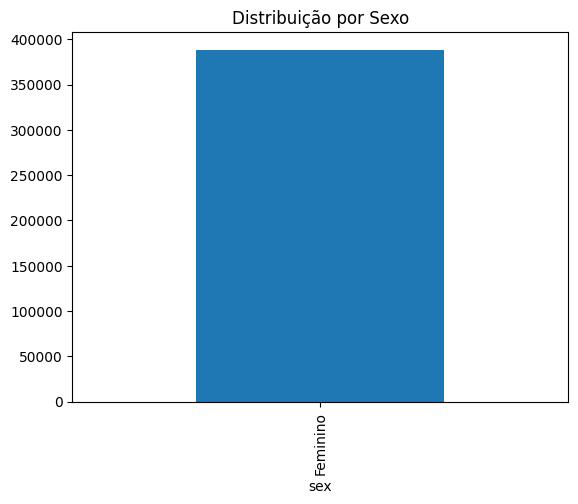

In [19]:
main['sex'].value_counts().plot(kind='bar', title='Distribuição por Sexo')


In [20]:
# Por possui somente uma categoria, e não passar no teste de qui-quadrado se faz necessário remover
df_cleaned.drop(columns=['sex'],inplace=True)

#### Race

<Axes: title={'center': 'Distribuição por Raça'}, xlabel='race'>

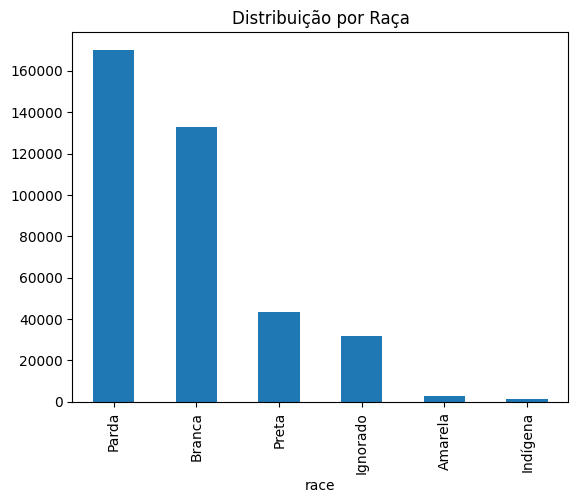

In [21]:
main['race'].value_counts().plot(kind='bar', title='Distribuição por Raça')

#### City Residence

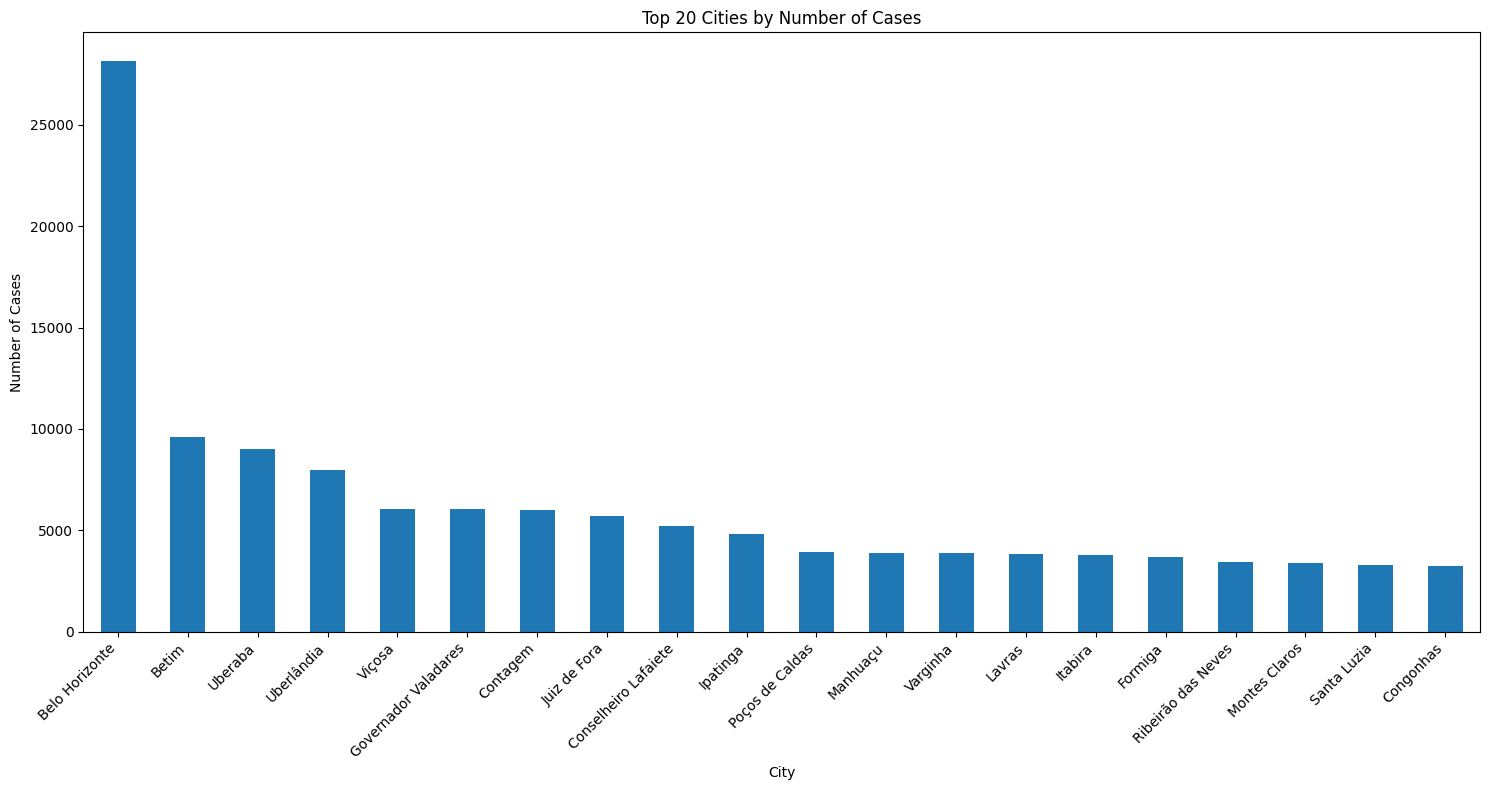

In [22]:
# Get value counts and create a bar plot
plt.figure(figsize=(15, 8))
city_counts = main['city_residence'].value_counts().head(20)
city_counts.plot(kind='bar')
plt.title('Top 20 Cities by Number of Cases')
plt.xlabel('City')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [23]:
city_categories = main['city_residence'].dropna().unique()
print(f"Total of cities: {len(city_categories)}")

Total of cities: 853


#### Gender Identity

<Axes: title={'center': 'Distribuição por Identidade de Gênero'}, xlabel='gender_identity'>

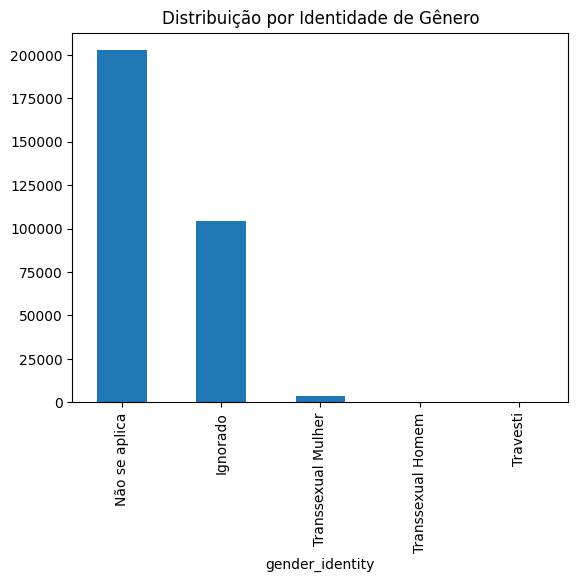

In [24]:
main['gender_identity'].value_counts().plot(kind='bar', title='Distribuição por Identidade de Gênero')

#### Occurrence Place

<Axes: title={'center': 'Distribuição por Local de Ocorrência'}, xlabel='occurrence_place'>

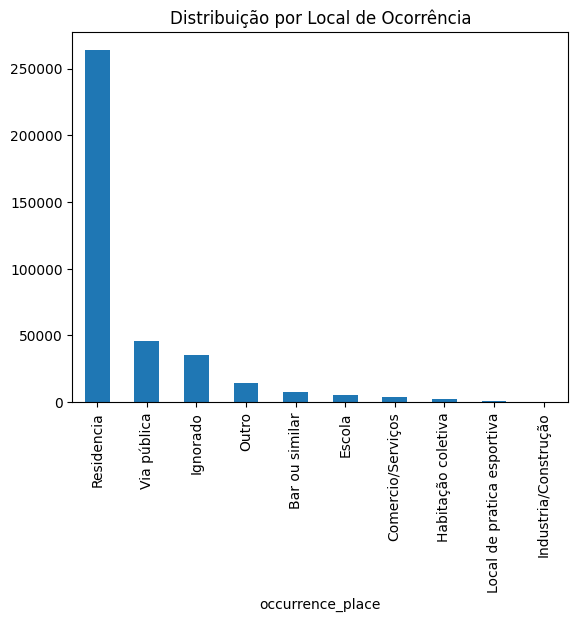

In [25]:
main['occurrence_place'].value_counts().plot(kind='bar', title='Distribuição por Local de Ocorrência')

#### Previous Occurrences

In [26]:
main['previous_occurrences'].value_counts()

previous_occurrences
Não         158391
Sim         140754
Ignorado     76406
Name: count, dtype: int64

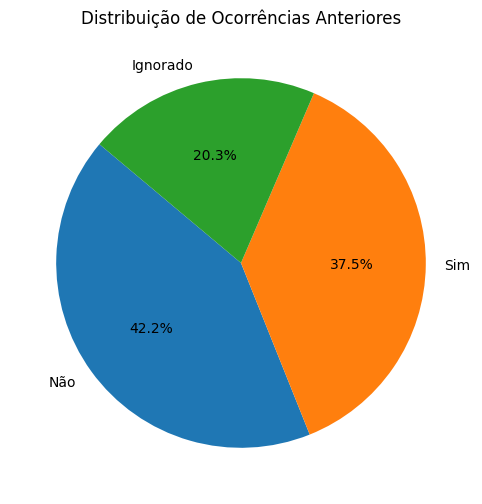

In [27]:
plt.figure(figsize=(10, 6))
plt.pie(main['previous_occurrences'].value_counts(),
        labels=main['previous_occurrences'].value_counts().index,
        autopct='%1.1f%%',
        startangle=140)
plt.title('Distribuição de Ocorrências Anteriores')
plt.show()

#### Self Harm

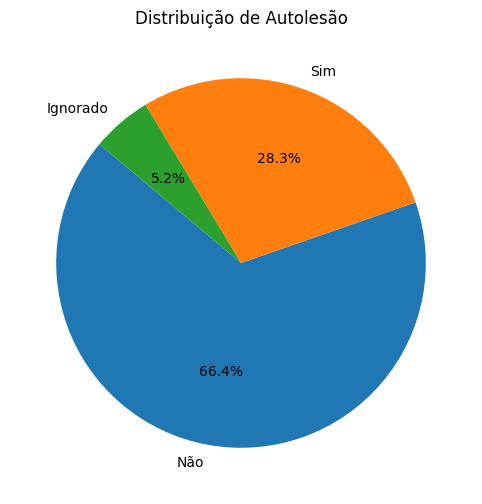

In [28]:
plt.figure(figsize=(10, 6))
plt.pie(main['self_harm'].value_counts(),
        labels=main['self_harm'].value_counts().index,
        autopct='%1.1f%%',
        startangle=140)
plt.title('Distribuição de Autolesão')
plt.show()

#### Physical Violence

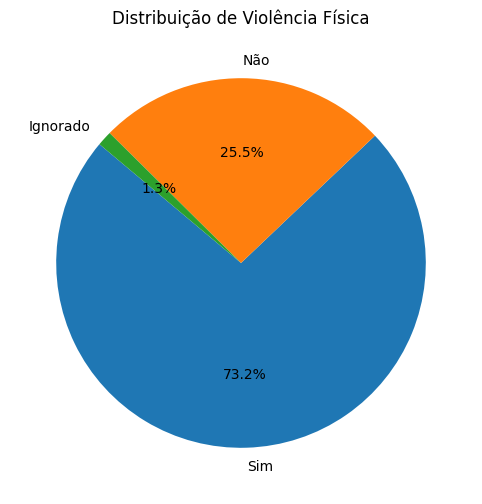

In [29]:
plt.figure(figsize=(10, 6))
plt.pie(main['physical_violence'].value_counts(),
        labels=main['physical_violence'].value_counts().index,
        autopct='%1.1f%%',
        startangle=140)
plt.title('Distribuição de Violência Física')
plt.show()

#### Psychological Violence

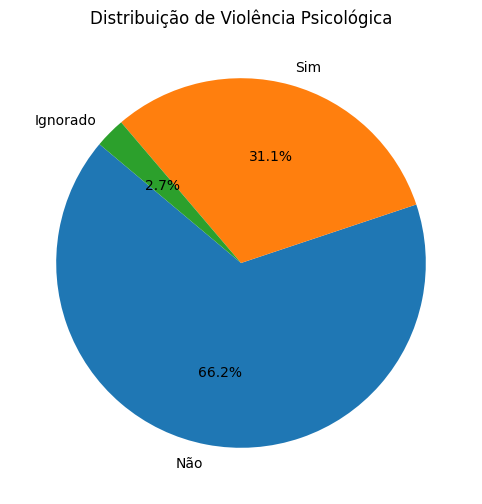

In [30]:
plt.figure(figsize=(10, 6))
plt.pie(main['psychological_violence'].value_counts(),
        labels=main['psychological_violence'].value_counts().index,
        autopct='%1.1f%%',
        startangle=140)
plt.title('Distribuição de Violência Psicológica')
plt.show()

#### Sexual Violence

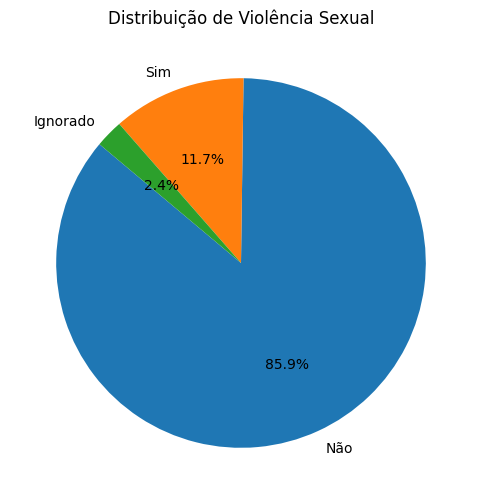

In [31]:
plt.figure(figsize=(10, 6))
plt.pie(main['sexual_violence'].value_counts(),
        labels=main['sexual_violence'].value_counts().index,
        autopct='%1.1f%%',
        startangle=140)
plt.title('Distribuição de Violência Sexual')
plt.show()

#### Num Perpetrators

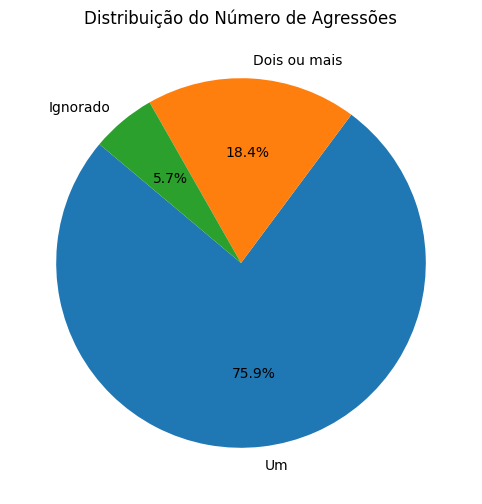

In [32]:
plt.figure(figsize=(10, 6))
plt.pie(main['num_perpetrators'].value_counts(),
        labels=main['num_perpetrators'].value_counts().index,
        autopct='%1.1f%%',
        startangle=140)
plt.title('Distribuição do Número de Agressões')
plt.show()

#### Perpetrator Sex

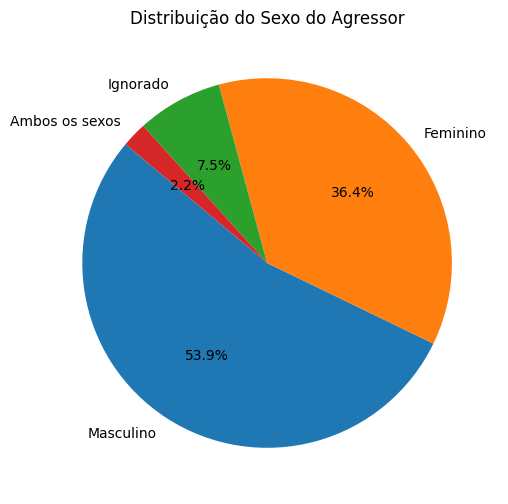

In [33]:
plt.figure(figsize=(10, 6))
plt.pie(main['perpetrator_sex'].value_counts(),
        labels=main['perpetrator_sex'].value_counts().index,
        autopct='%1.1f%%',
        startangle=140)
plt.title('Distribuição do Sexo do Agressor')
plt.show()

#### Sexual Orientation

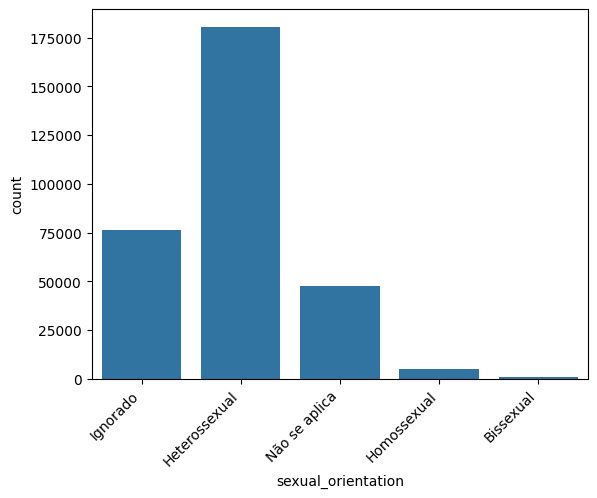

In [34]:
sns.countplot(data=main, x='sexual_orientation')
plt.xticks(rotation=45, ha='right')
plt.show()

### Numerics

#### Age

In [35]:
main['age'] = pd.to_numeric(main['age'], errors='coerce').astype('Int64')

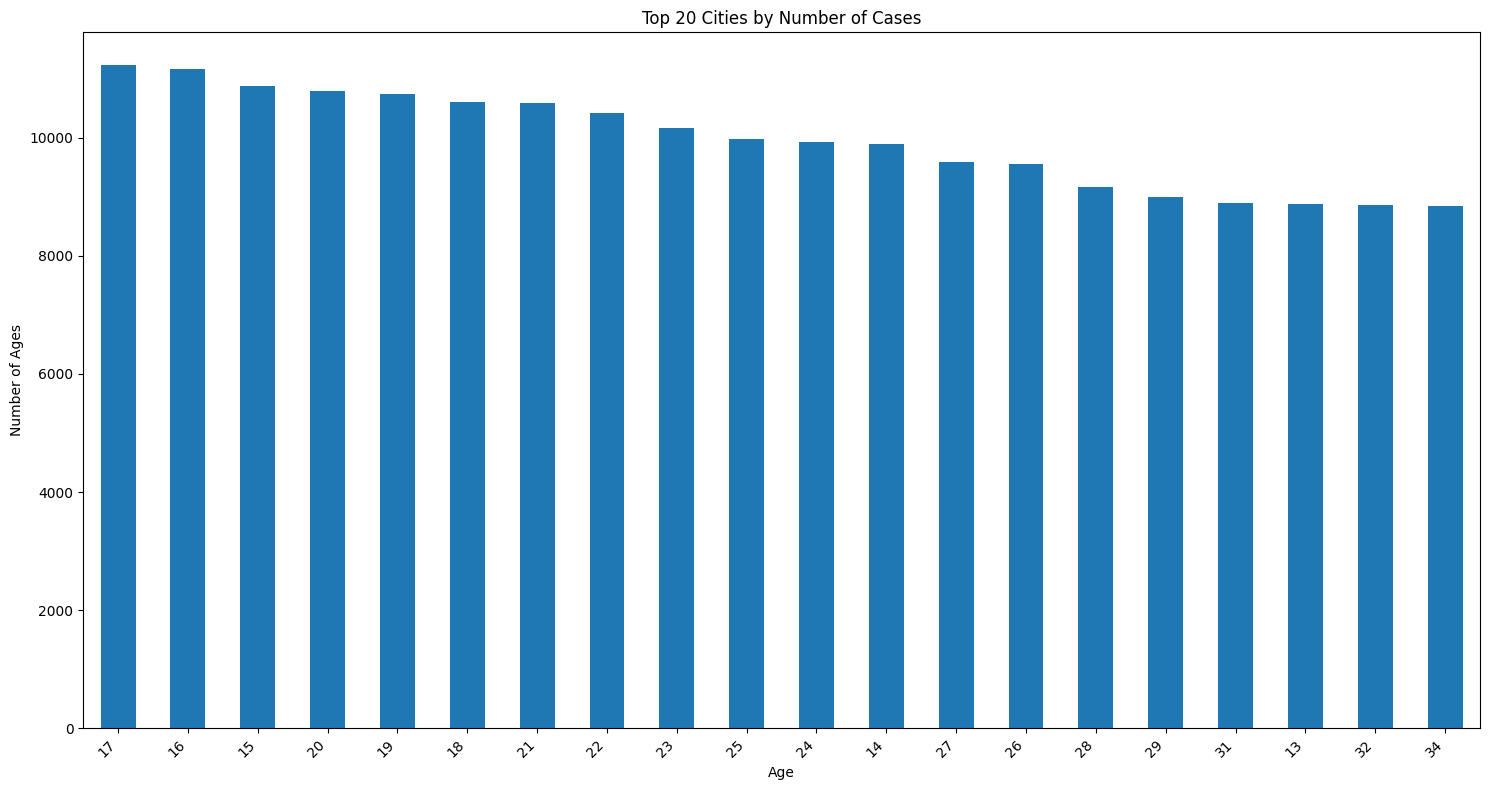

In [36]:
# Get value counts and create a bar plot
plt.figure(figsize=(15, 8))
city_counts = main['age'].value_counts().head(20)
city_counts.plot(kind='bar')
plt.title('Top 20 Cities by Number of Cases')
plt.xlabel('Age')
plt.ylabel('Number of Ages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

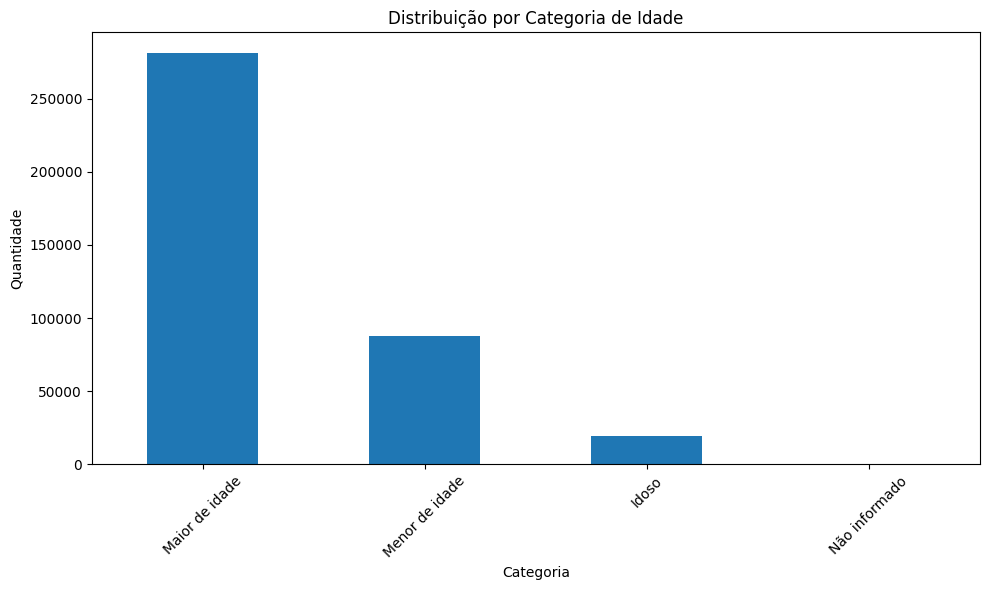

In [37]:
def categorize_age(age):
    if pd.isna(age):
        return 'Não informado'
    elif age < 18:
        return 'Menor de idade'
    elif age < 60:
        return 'Maior de idade'
    else:
        return 'Idoso'

# Create new column with age categories
main['age_category'] = main['age'].apply(categorize_age)

# Plot distribution
plt.figure(figsize=(10, 6))
age_counts = main['age_category'].value_counts()
age_counts.plot(kind='bar')
plt.title('Distribuição por Categoria de Idade')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:

vars = ['race', 'city_residence', 'occurrence_place', 'previous_occurrences',
             'self_harm', 'physical_violence', 'psychological_violence', 'sexual_violence', 'num_perpetrators',
             'perpetrator_sex', 'sexual_orientation', 'gender_identity','age_category']
filtered_vars = [v for v in vars if main[v].nunique() > 1]
chi2_function(filtered_vars, main)


                      var1                    var2        p-valor  \
0                     race          city_residence   0.000000e+00   
1                     race        occurrence_place   0.000000e+00   
2                     race    previous_occurrences   0.000000e+00   
3                     race               self_harm   0.000000e+00   
4                     race       physical_violence   0.000000e+00   
5                     race  psychological_violence   0.000000e+00   
6                     race         sexual_violence   0.000000e+00   
7                     race        num_perpetrators   0.000000e+00   
8                     race         perpetrator_sex   0.000000e+00   
9                     race      sexual_orientation   0.000000e+00   
10                    race         gender_identity   0.000000e+00   
12          city_residence        occurrence_place   0.000000e+00   
14          city_residence               self_harm   0.000000e+00   
13          city_residence    prev

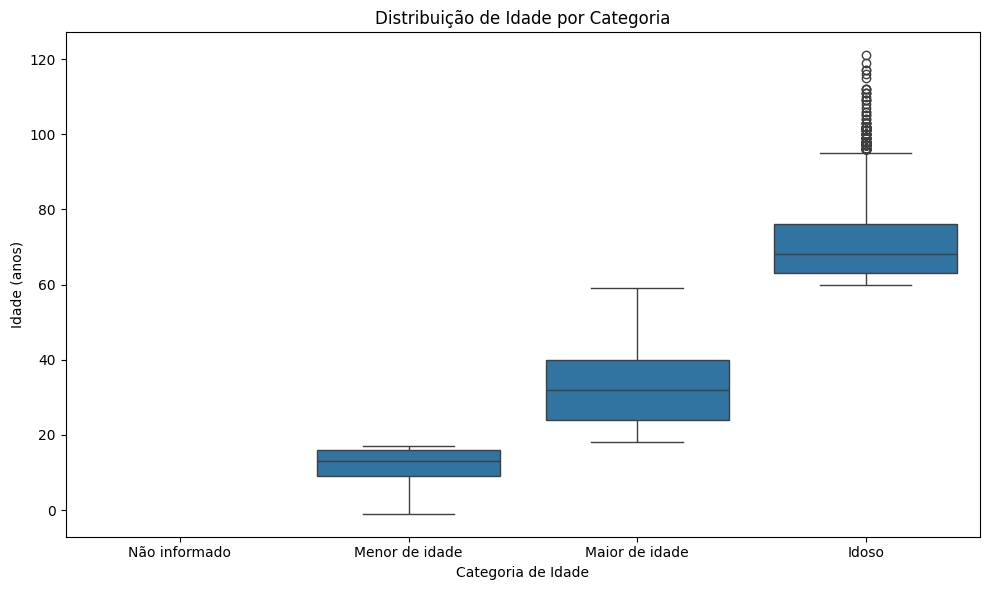

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=main, 
    x='age_category',
    y='age',
    order=['Não informado','Menor de idade','Maior de idade','Idoso']
)
plt.title('Distribuição de Idade por Categoria')
plt.xlabel('Categoria de Idade')
plt.ylabel('Idade (anos)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Notification Date

<Axes: title={'center': 'Distribuição por Ano de Notificação'}, xlabel='notification_date'>

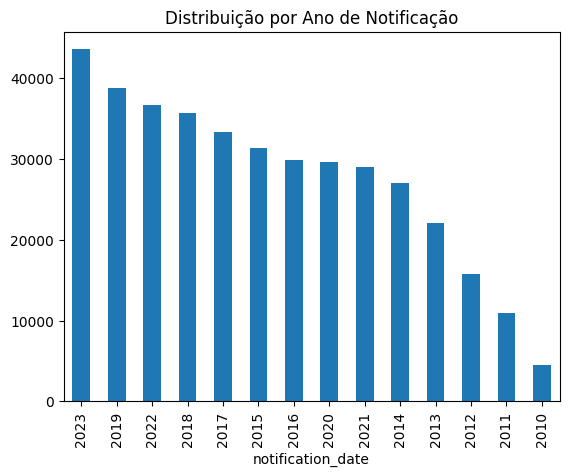

In [40]:
main['notification_date'].dt.year.value_counts().plot(kind='bar', title='Distribuição por Ano de Notificação')

<Axes: title={'center': 'Distribuição por Ano de Notificação'}, xlabel='notification_date'>

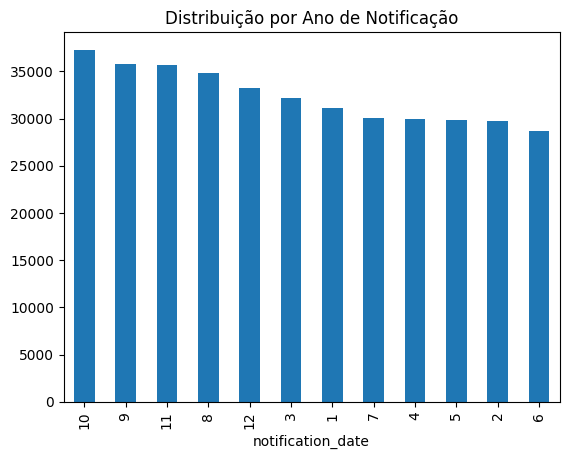

In [41]:
main['notification_date'].dt.month.value_counts().plot(kind='bar', title='Distribuição por Ano de Notificação')

# Baseado nas datas verificar os feriados e finais de semana para analise de acontecimentos.